# <font color='black'>Heart Attack Prediction</font>

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
%matplotlib inline
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.shape

(303, 14)

In [3]:
#First 5 rows of dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Statistical info about data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Datatype of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Check no. of unique values in each feature
df.apply(lambda x: len(x.unique()))

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [7]:
#Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
#Check for duplicate rows
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
#Dropping the duplicate rows
df.drop_duplicates(keep='first', inplace=True)

In [10]:
#Checking the new shape
df.shape

(302, 14)

In [11]:
#Checking Correlation Matrix
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


## Exploratory Data Analysis

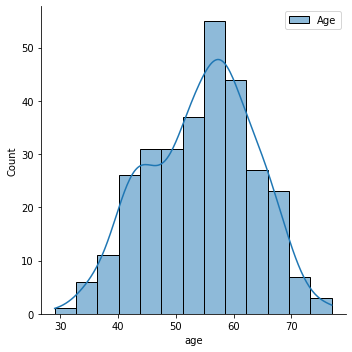

In [12]:
#Plotting on the basis of Age
sns.displot(df['age'], label = 'Age', kde=True)
plt.legend()

- **Density distribution is highest for age group 55 to 60**

<AxesSubplot:xlabel='sex', ylabel='count'>

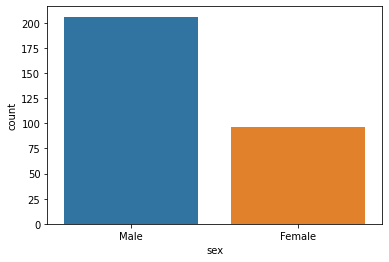

In [13]:
#Plotting on the basis of gender
sns.countplot(df['sex'].replace({0: 'Female', 1: 'Male'}))

- **Males have more probability of having a heart attack. (According to our Data)**

<AxesSubplot:xlabel='cp', ylabel='count'>

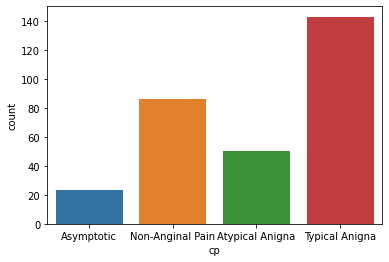

In [14]:
#Types of Chest Pain
sns.countplot(df['cp'].replace({0:'Typical Anigna', 1:'Atypical Anigna', 2:'Non-Anginal Pain', 3:'Asymptotic'}))

1. **It can be observed people having chest pain of type 'Typical Angina' is the highest.**
2. **It can be observed people having chest pain of type 'Asymptomatic' is the lowest.**
3. **It can also be observed people with chest pain of Typical Anigna is almost 50% of all the people.**

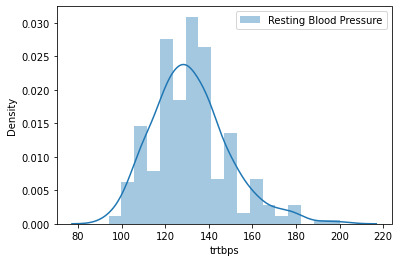

In [15]:
#Plotting on the basis of Resting Blood Pressure
sns.distplot(df['trtbps'], label="Resting Blood Pressure", kde= True)
plt.legend()

- **Resting blood pressure is highest around 130-135**

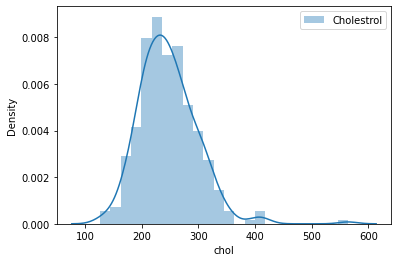

In [16]:
#Plotting on the basis of Cholestrol
sns.distplot(df['chol'], label='Cholestrol', kde=True)
plt.legend()

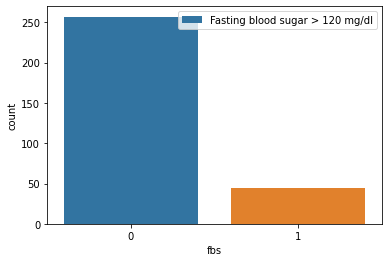

In [17]:
#Plotting on basis of fasting blood sugar
sns.countplot(df['fbs'], label = 'Fasting blood sugar > 120 mg/dl')
plt.legend()

<AxesSubplot:xlabel='restecg', ylabel='count'>

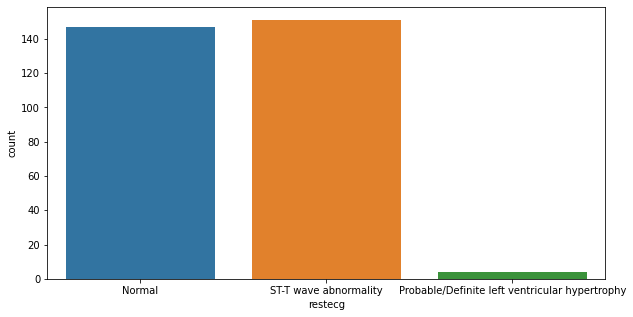

In [18]:
#Plotting on basis of ecg
plt.figure(figsize=[10,5])
sns.countplot(df['restecg'].replace({0:'Normal',
                                     1:'ST-T wave abnormality',
                                     2:'Probable/Definite left ventricular hypertrophy'}))

<AxesSubplot:xlabel='thalachh', ylabel='Density'>

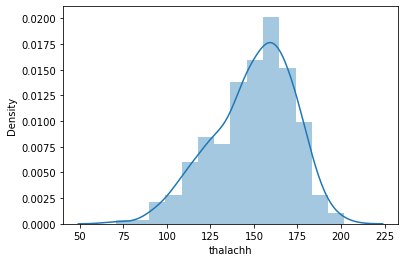

In [19]:
#Maximum heart rate achieved
sns.distplot(df['thalachh'])

<AxesSubplot:xlabel='exng', ylabel='count'>

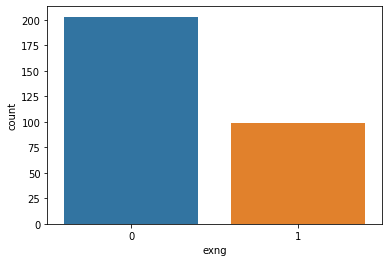

In [20]:
#Exercise Induced Anigna
sns.countplot(df['exng'])

<Figure size 1440x1440 with 0 Axes>

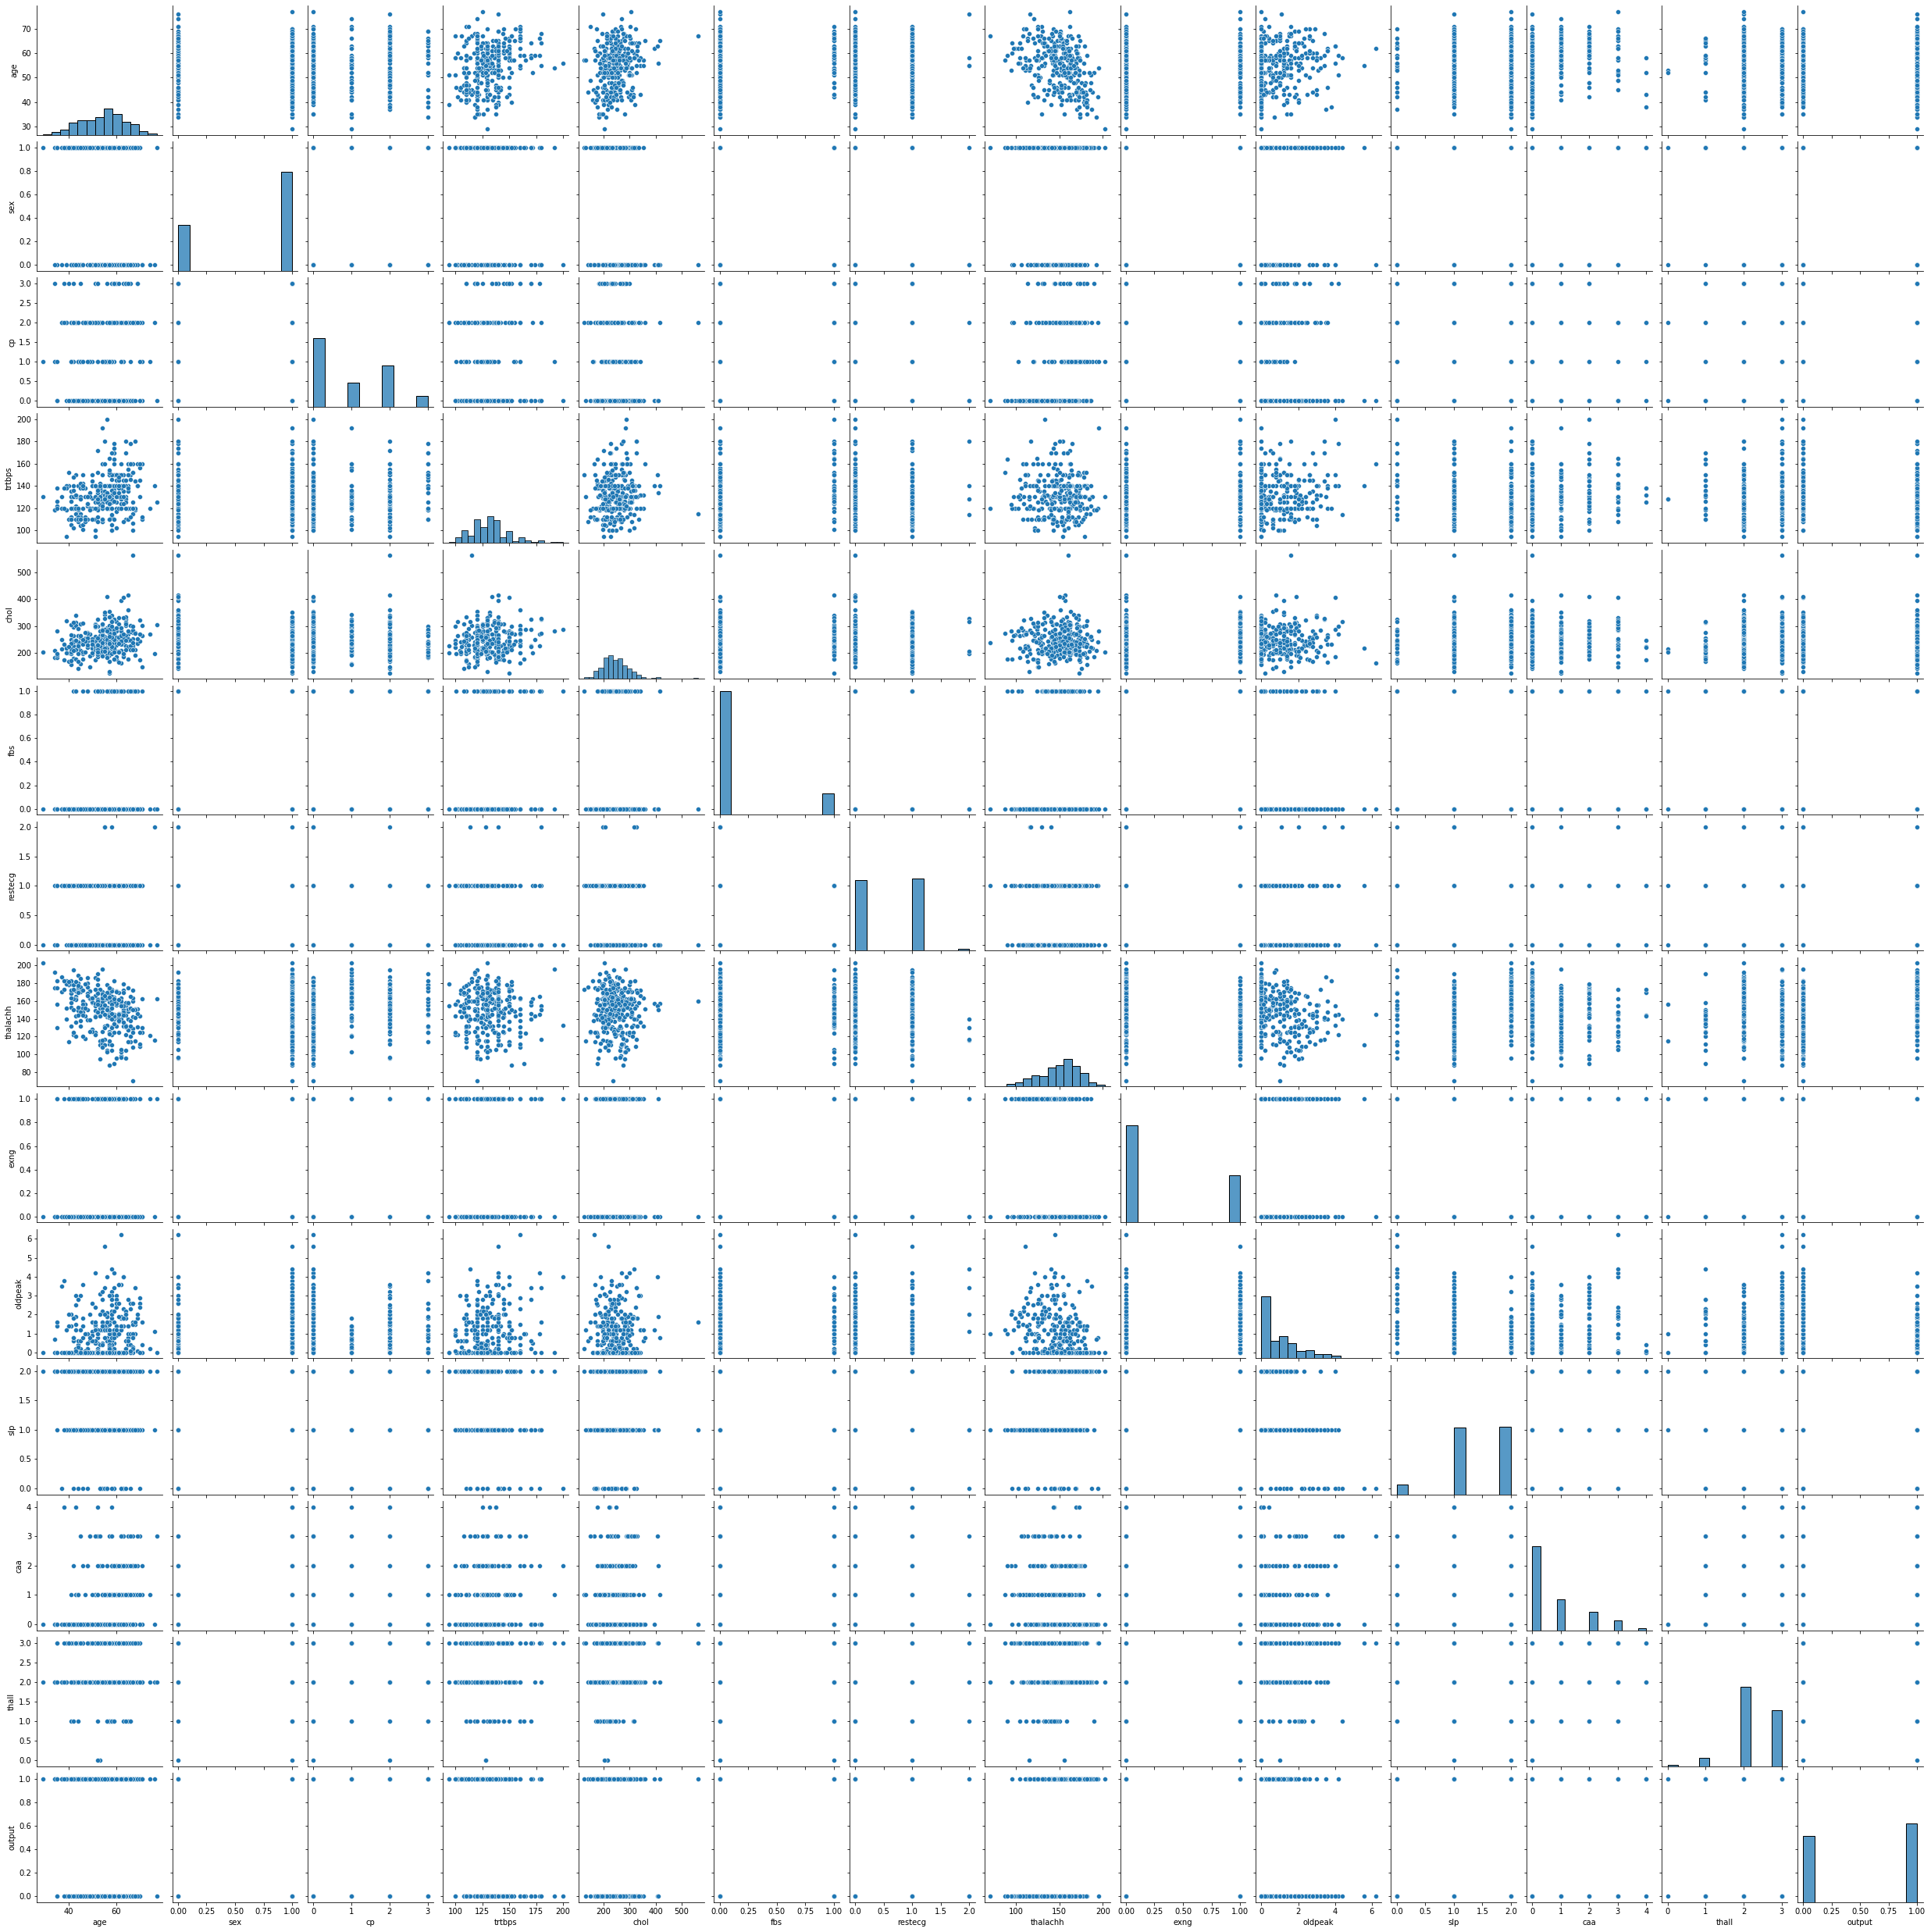

In [21]:
#Pair Plots
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

## Preprocessing

In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [23]:
#Transorming the data
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=8)

## Model training

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test)
cnf = confusion_matrix(y_test, y_pred)
cnf

array([[22,  3],
       [ 4, 32]], dtype=int64)

## Evaluation

<AxesSubplot:>

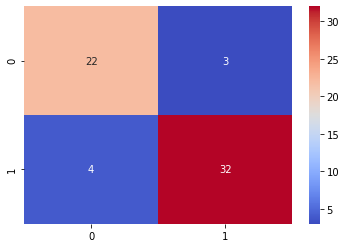

In [27]:
#Confusion Matrix Heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='coolwarm')

In [28]:
#Metrics
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred).round(3))
print("F1 Score:",f1_score(y_test,y_pred).round(3))

Accuracy: 0.8852459016393442
Precision: 0.9142857142857143
Recall: 0.889
F1 Score: 0.901


## Tuning The Threshold (Precison v/s. Recall Trade-off)

In [29]:
#Threshold changed to 0.275 (By default = 0.5)
y_pred = np.where(model.predict_proba(X_test)[:,1] > 0.275, 1, 0)
cnf = confusion_matrix(y_test, y_pred)
cnf

array([[20,  5],
       [ 3, 33]], dtype=int64)

<AxesSubplot:>

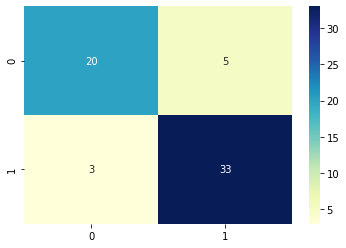

In [30]:
#Confusion Matrix after tuning
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')

In [31]:
# After tuning, Metrics are
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred).round(3))
print("F1 Score:",f1_score(y_test,y_pred).round(3))

Accuracy: 0.8688524590163934
Precision: 0.868421052631579
Recall: 0.917
F1 Score: 0.892


#### Conclusion : We sacrificed a bit of precision to increase recall, As we need more cases to be identified beforehand.